In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ruta al archivo Parquet 
ruta_archivo = "C:/Users/Herre/Desktop/TFM/Nuclio_EasyMoney/0_Data/df_encoding.csv"
# Leer el archivo Parquet 
df_cluster = pd.read_csv(ruta_archivo)

In [4]:
df_cluster

,pk_cid,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,region_code,age,salary,entry_date_year,entry_date_month,entry_date_day,entry_date_weekday,pk_partition_year,pk_partition_month,pk_partition_day,pk_partition_weekday,entry_channel_KFC,entry_channel_KHE,entry_channel_KHQ,entry_channel_Otros,country_id_ES,gender_V,deceased_S
0,1297423,0.0,2,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,28.0,47,192902.31,2017,8,18,4,2018,7,28,5,0,0,0,1,1,0,0
1,1087842,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,41.0,26,2783985.75,2015,10,24,5,2018,7,28,5,0,1,0,0,1,0,0
2,1147514,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,16.0,22,81755.43,2016,7,25,0,2018,7,28,5,0,1,0,0,1,0,0
3,1147863,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,2.0,22,81755.43,2016,7,25,0,2018,7,28,5,0,1,0,0,1,0,0
4,1147587,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,8.0,22,81755.43,2016,7,25,0,2018,7,28,5,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445484,1164494,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,30.0,22,67228.32,2016,8,13,5,2019,5,28,1,0,1,0,0,1,0,0
445485,1164521,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,2.0,24,43249.20,2016,8,13,5,2019,5,28,1,0,1,0,0,1,1,0
445486,1164462,0.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13.0,25,94495.50,2016,8,13,5,2019,5,28,1,0,1,0,0,1,0,0
445487,1164587,1.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,46.0,22,177287.82,2016,8,13,5,2019,5,28,1,0,1,0,0,1,1,0


# Elbow curve

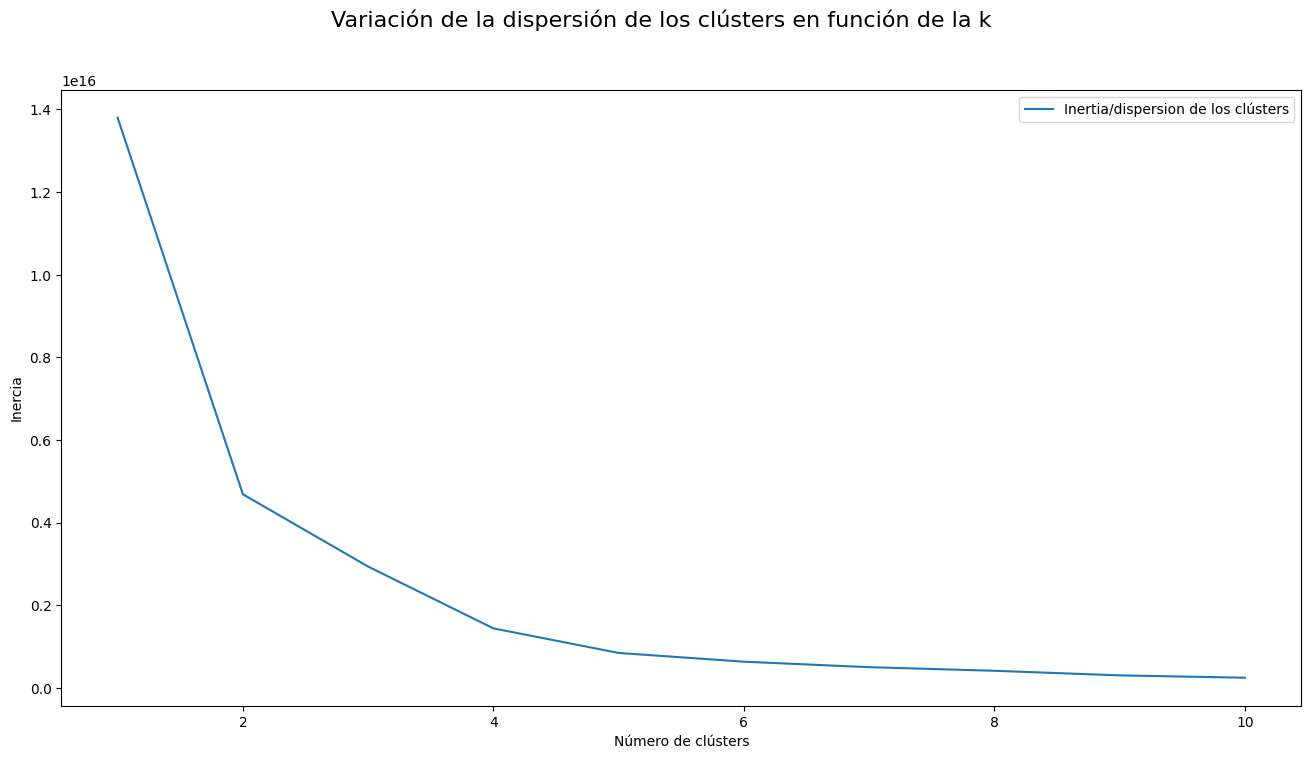

In [9]:
X = df_cluster.drop(columns=['age', 'salary'])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

# Crear Elbow curve
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label="Inertia/dispersion de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize=16)
ax.set_xlabel("Número de clústers")
ax.set_ylabel("Inercia")
ax.legend()
plt.show()

In [10]:
# No le hacemos caso a la Curva del Codo porque directamente nos han pedido 7-8 Clusters.

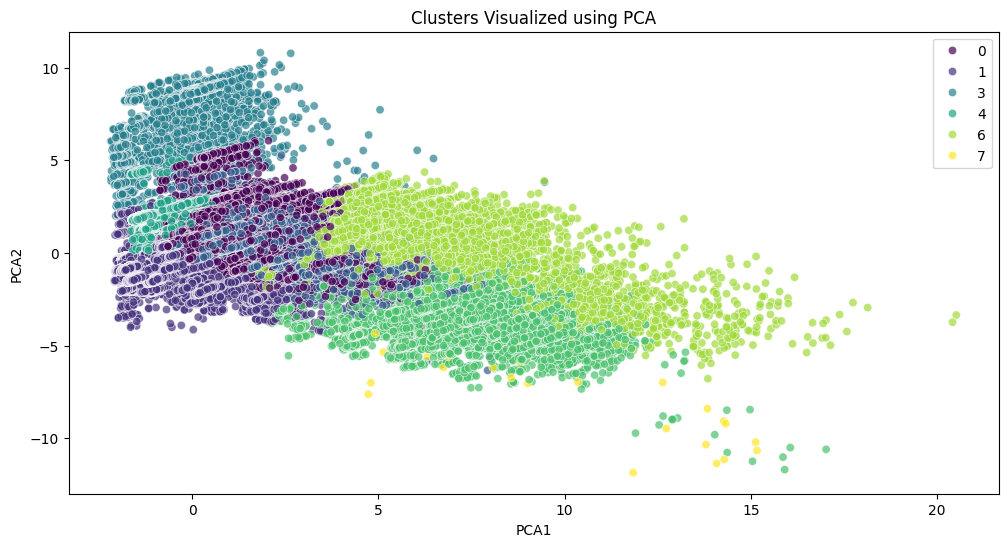

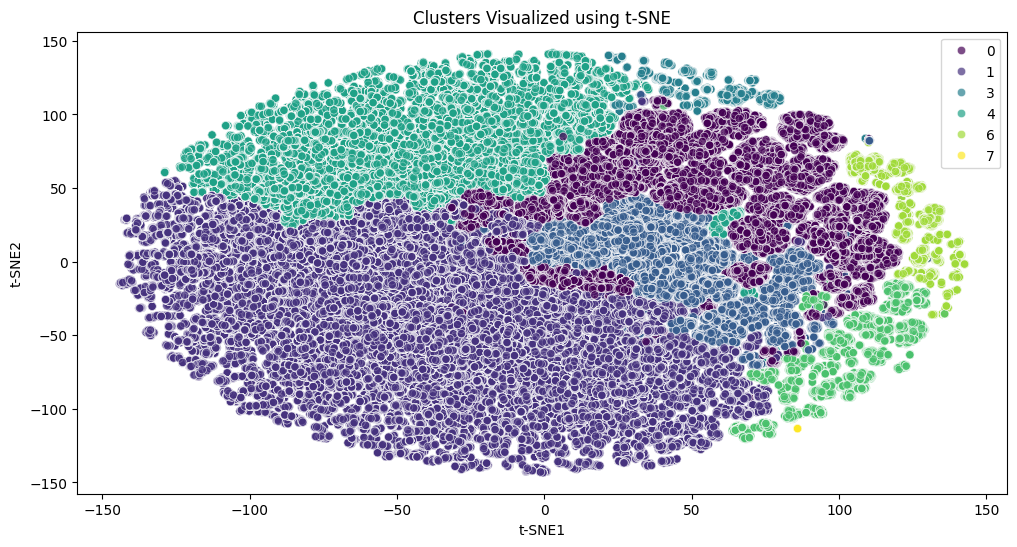

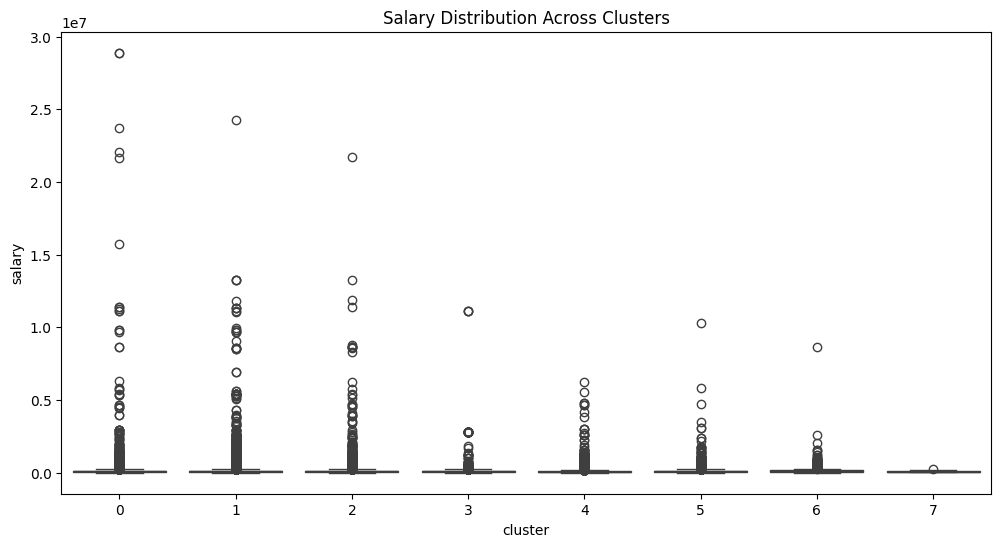

In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
# Perform K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)  # Adjust the number of clusters if needed
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_reduced['t-SNE1'] = X_tsne[:, 0]
df_reduced['t-SNE2'] = X_tsne[:, 1]
df_reduced['salary'] = df_cluster['salary']
df_reduced['cluster'] = df_cluster['cluster']

# Plotting PCA clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='viridis', data=df_reduced, alpha=0.7)
plt.title('Clusters Visualized using PCA')
plt.legend()
plt.show()

# Plotting t-SNE clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='cluster', palette='viridis', data=df_reduced, alpha=0.7)
plt.title('Clusters Visualized using t-SNE')
plt.legend()
plt.show()

# Visualizing the salary distribution across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='salary', data=df_reduced)
plt.title('Salary Distribution Across Clusters')
plt.show()

# Crear Nuevas Features

El objetivo de crear nuevas features es para poder hacer una mejor segmentación de los clientes.

**number_of_products:** Número de productos financieros que el cliente tiene con el banco (si tienes una columna que lo indique).

Esta columna podría representar el número total de productos financieros que un cliente tiene con el banco. A partir de las columnas disponibles, podemos considerar cualquier columna que indique un producto financiero (por ejemplo, depósitos, préstamos, tarjetas de crédito, etc.) como parte del total de productos.

**account_balance**: Saldo promedio de la cuenta, si está disponible, para indicar la capacidad financiera.

Aunque no tenemos una columna específica para account_balance, podríamos inferir un valor basado en los activos del cliente, como depósitos a corto plazo (short_term_deposit), fondos, valores, etc., si esos valores son cuantitativos. Si estas columnas indican si el cliente tiene estos productos (con valores binarios 0 o 1), no podremos calcular el balance. Necesitamos clarificar qué representa.

**loan_amount o debt_amount:** Si tienes columnas relacionadas con la deuda o préstamos, estas pueden ser útiles para segmentar clientes según el riesgo financiero. 

Esta columna puede representar el monto total del préstamo de un cliente. Podemos inferirlo de columnas relacionadas con productos de préstamos como loans y mortgage (si esos valores representan montos y no solo una indicación de presencia del producto).

In [13]:
# 1. Crear 'number_of_products'
# Suponiendo que cada columna de productos (como 'short_term_deposit', 'loans', etc.) tiene un valor de 0 o 1
product_columns = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
                   'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 
                   'emc_account', 'debit_card', 'em_account_p', 'em_acount']

df_cluster['number_of_products'] = df_cluster[product_columns].sum(axis=1)

# 2. Crear 'account_balance'
# Suponiendo que 'account_balance' puede inferirse de ciertas columnas relacionadas con activos financieros. 
# Si estas columnas son binarias (0/1), no podemos calcular un balance real. Ajusta esto según tus datos reales.
# Si estas columnas representan montos, simplemente suma los montos.
balance_columns = ['short_term_deposit', 'funds', 'securities', 'long_term_deposit']

df_cluster['account_balance'] = df_cluster[balance_columns].sum(axis=1)

# 3. Crear 'loan_amount'
# Suponiendo que 'loan_amount' es la suma de todas las columnas relacionadas con préstamos.
loan_columns = ['loans', 'mortgage']

df_cluster['loan_amount'] = df_cluster[loan_columns].sum(axis=1)

# Verifica las nuevas columnas
df_cluster[['number_of_products', 'account_balance', 'loan_amount']].head()


   number_of_products  account_balance  loan_amount
0                 0.0                0            0
1                 0.0                0            0
2                 0.0                0            0
3                 0.0                0            0
4                 0.0                0            0


# Tabla Clusters

In [26]:
# Definir las columnas relevantes para el clustering
summary_columns = ["salary","loan_amount", "age", "number_of_products" ]

# Inicializar el DataFrame ficha_df
ficha_df = pd.DataFrame()

# Generar los datos resumen para cada columna
for col in summary_columns:
    resumen_data = df_cluster[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

# Definir los componentes del multi-índice
out_index = ["Monetario"] * 2 + ["Edad"] * 1 + ["Productos"] * 1  # Ajusta esta lista según las columnas seleccionadas
inner_index = summary_columns
estadisticos = ["mean", "std", "min", "25%", "50%", "75%", "max"]

# Crear el nuevo multi-índice
new_multi_index = []
for oi, ii in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

# Generar el multi-índice
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names=names)

names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)

# Establecer el multi-índice en ficha_df
ficha_df.set_index(index_ficha, inplace=True)

# Calcular el tamaño de cada cluster
tamaño_clusters = df_cluster.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")], names), inplace=True)

# Concatenar los datos de tamaño con el DataFrame ficha_df
ficha_df = pd.concat([tamaño_clusters, ficha_df])

# Estilizar el DataFrame con un gradiente de fondo
styled_ficha_df = ficha_df.style.background_gradient(cmap='Blues', axis=1)

# Mostrar el DataFrame estilizado
styled_ficha_df

# Exportamos el archivo

In [25]:
# Guardar resultados
ficha_df.to_csv('ficha_df.csv', index=False)